In [44]:
# required libraries
import numpy as np
import pandas as pd

In [45]:
# Load the dataset into pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/IDATASET/HeightVsWeight.csv')
data

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [46]:
data.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [47]:
data.head(10)

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
5,15,139
6,16,140
7,17,140
8,18,140
9,19,141


In [48]:
data.tail()

,Age,Height
66,76,204
67,77,205
68,78,206
69,79,207
70,80,208


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [50]:
# age(x) -> Independent variable
# height(y) -> Dependent variable

In [51]:
data.shape

(71, 2)

In [52]:
data.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


#Data Pre-processing
#Step1: Handle Missing Data

In [53]:
data.isnull().any()

Age       False
Height    False
dtype: bool

#Step2: Convert text column if any. to numeric column
#Its not required as there are no non numeric columns
#Step3: Perform Data Visualization

In [19]:
import matplotlib.pyplot as plt

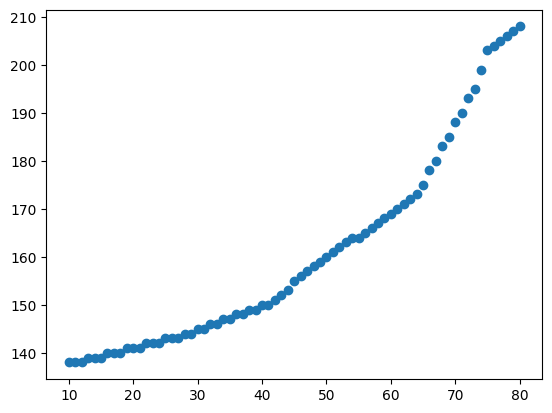

In [54]:
plt.scatter(data.Age, data.Height)

In [69]:
data.iloc[:,:0]


""
0
1
2
3
4
...
66
67
68
69


#Step4: Split the data into dependent and independent variable

In [55]:
x = data.iloc[:,:1]
x

,Age
0,10
1,11
2,12
3,13
4,14
...,...
66,76
67,77
68,78
69,79


In [63]:
y = data.iloc[:,1:2]
y

,Height
0,138
1,138
2,138
3,139
4,139
...,...
66,204
67,205
68,206
69,207


In [57]:
type(x)

pandas.core.frame.DataFrame

In [58]:
type(y)

pandas.core.frame.DataFrame

In [26]:
np.shape(x)

(71, 1)

In [27]:
np.shape(y)

(71, 1)

#Step 5: Splitting the data into training and testing dataset

In [28]:
# Scikitlearn library has a train-test-fit function
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [30]:
print(x_train.shape) # Training input

(56, 1)


In [31]:
print(x_test.shape) # testing input

(15, 1)


In [32]:
print(y_train.shape) # training output

(56, 1)


In [33]:
print(y_test.shape) # testing output

(15, 1)


#Model Building - Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

#Performing Linear regression by fitting the training data to the model

In [35]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#Perform Testing

In [36]:
y_pred = lr.predict(x_test)
y_pred

array([[153.13844132],
       [154.08520968],
       [173.96734518],
       [149.35136789],
       [156.92551475],
       [176.80765025],
       [135.14984253],
       [184.38179711],
       [160.71258818],
       [194.79624904],
       [181.54149204],
       [155.03197803],
       [157.87228311],
       [168.28673504],
       [159.76581982]])

#Compare Predicted value to actual value

In [37]:
y_pred # predicted y

array([[153.13844132],
       [154.08520968],
       [173.96734518],
       [149.35136789],
       [156.92551475],
       [176.80765025],
       [135.14984253],
       [184.38179711],
       [160.71258818],
       [194.79624904],
       [181.54149204],
       [155.03197803],
       [157.87228311],
       [168.28673504],
       [159.76581982]])

In [38]:
y_test # actual y

,Height
26,148
27,148
48,167
22,146
30,150
51,170
7,140
59,185
34,153
70,208


In [39]:
# importing r2score metric
from sklearn.metrics import r2_score

In [40]:
# accuracy checking
acc = r2_score(y_pred, y_test)
acc

0.7990120568564345

#Let us predict the value of y for some random input x

In [41]:
height = lr.predict([[15]])
height

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[133.25630582]])

#Draw the best-fit line

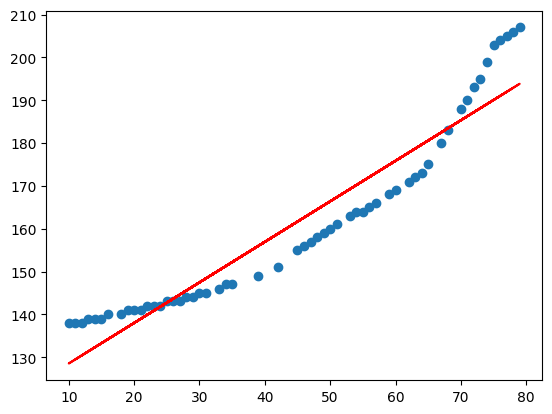

In [42]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train),'r')

#Model Building - Polynomuial Regression

In [70]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
# Create a numpy array with your age data
age = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])
print(age)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]


In [91]:
# Create a numpy array with your height data
height = np.array([138, 138, 138, 139, 139, 139, 140, 140, 140, 141, 141, 141, 142, 142, 142, 143, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 178, 180, 183, 185, 188, 190, 193, 195, 199, 203, 204, 205, 206, 207, 208])
print(height)

[138 138 138 139 139 139 140 140 140 141 141 141 142 142 142 143 143 143
 144 144 145 145 146 146 147 147 148 148 149 149 150 150 151 152 153 155
 156 157 158 159 160 161 162 163 164 164 165 166 167 168 169 170 171 172
 173 175 178 180 183 185 188 190 193 195 199 203 204 205 206 207 208]


  # Reshape the data to

In [85]:
# Reshape the data to fit the model
age = age.reshape(-1, 1)
height = height.reshape(-1, 1)
print(age,height)

[[10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]] [[138]
 [138]
 [138]
 [139]
 [139]
 [139]
 [140]
 [140]
 [140]
 [141]
 [141]
 [141]
 [142]
 [142]
 [142]
 [143]
 [143]
 [143]
 [144]
 [144]
 [145]
 [145]
 [146]
 [146]
 [147]
 [147]
 [148]
 [148]
 [149]
 [149]
 [150]
 [150]
 [151]
 [152]
 [153]
 [155]
 [156]
 [157]
 [158]
 [159]
 [160]
 [161]
 [162]
 [163]
 [164]
 [164]
 [165]
 [166]
 [167]
 [168]
 [169]
 [170]
 [171]
 [172]
 [173]
 [175]
 [178]
 [180]
 [183]
 [185]
 [188]
 [190]
 [193]
 [195]
 [199]
 [203]
 [204]
 [205]
 [206]
 [207]
 [208]]


In [92]:
# Polynomial regression
degree = 3

In [93]:
# You can adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [78]:
# Make predictions on the test set
y_pred = model.predict(X_test_poly)

In [82]:
#Calculate R^2 score
acc = r2_score(y_pred, y_test)
acc

0.9939613528936574

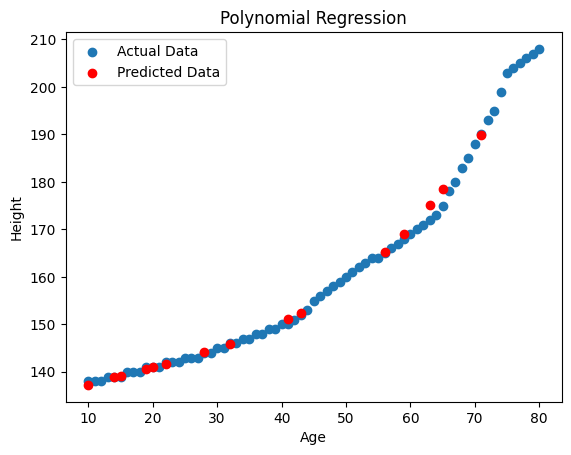

In [80]:
#Visualize the results
plt.scatter(age, height, label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()